In [51]:
# coding=utf8
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [52]:
# 1. 获取数据
# 2. 基本数据处理
# 2.1 缺失值处理
# 2.2 确定特征值，目标值
# 2.3 分割数据
# 3. 特征工程（标准化）
# 4. 机器学习（逻辑回归）
# 5. 模型评估

In [82]:
# 1. 获取数据
iris = datasets.load_iris()

X = iris.data
y = iris.target
# 取y<2的类别，前2列数据
X = X[y < 2, :2]
y = y[y < 2]

print(X.shape)
print(X.ndim)

print(y.shape)
print(y.ndim)
print(type(y))

2
(100, 2)
1
(100,)
<class 'numpy.ndarray'>


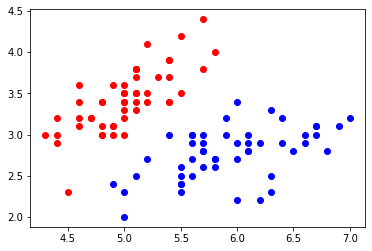

In [54]:
#画图
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

In [55]:
# 3. 特征工程（标准化）
from sklearn.preprocessing import StandardScaler

standarScaler = StandardScaler()
standarScaler.fit(X)
X_standard = standarScaler.transform(X)

In [70]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1)
svc.fit(X_standard, y)

LinearSVC(C=1)

In [57]:
# 定义机器学习算法的决策边界输出函数
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-3, 3),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-3, 3)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


C:\Users\yalin\AppData\Local\Temp/ipykernel_19488/3298936273.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


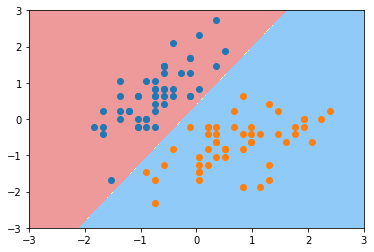

In [58]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

In [72]:
# 不同的C的的svm训练情况
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01)

C:\Users\yalin\AppData\Local\Temp/ipykernel_19488/3298936273.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


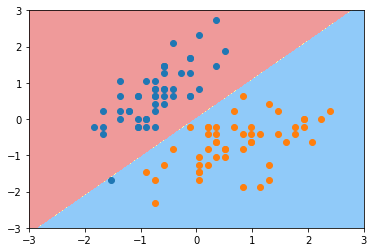

In [60]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

In [61]:
# 超平面的系数
svc.coef_

array([[ 4.0324339 , -2.50701713]])

In [62]:
# 超平面的截距
svc.intercept_

array([0.92734599])

In [63]:
# 定义机器学习算法的决策边界输出函数
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-3, 3),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-3, 3)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])

    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]
    # w0 * x0 + w1 + x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0] / w[1] * plot_x - b / w[1] + 1 / w[1]
    down_y = -w[0] / w[1] * plot_x - b / w[1] - 1 / w[1]

    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

C:\Users\yalin\AppData\Local\Temp/ipykernel_19488/1803850877.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


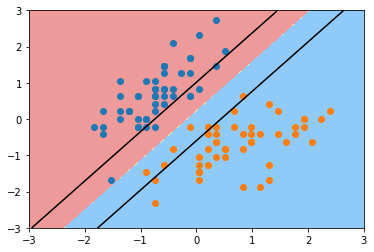

In [71]:
# svc 训练模型显示
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()

C:\Users\yalin\AppData\Local\Temp/ipykernel_19488/1803850877.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


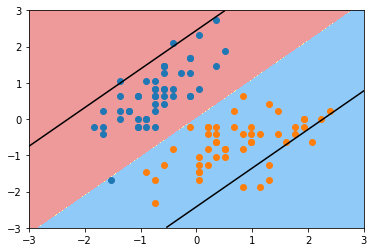

In [69]:
# svc2 训练模型显示
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y == 0, 0], X_standard[y == 0, 1])
plt.scatter(X_standard[y == 1, 0], X_standard[y == 1, 1])
plt.show()